In [1]:
import pandas as pd

In [2]:
data = {}
with open("Data/movie_titles.csv", encoding='latin1') as fp:
    for line in fp:
        parts = line.strip().split(",", 2)  
        movie_id = int(parts[0])
        year = parts[1] if len(parts) > 1 else ""
        title = parts[2] if len(parts) > 2 else ""
        data[movie_id] = (year, title)

In [3]:
movies = pd.DataFrame(data).T
movies.columns= ["year", "title"]

In [4]:
movies["year"] = pd.to_numeric(movies["year"], errors='coerce').astype("Int32")
movies["title"] = movies["title"].str.strip()

In [5]:
movies["title"].head()

1                 Dinosaur Planet
2      Isle of Man TT 2004 Review
3                       Character
4    Paula Abdul's Get Up & Dance
5        The Rise and Fall of ECW
Name: title, dtype: object

In [6]:
ratings1 = pd.read_csv("Data/rating_1.txt", header=None, names=["user_id", "movie_id", "timestamp", "rating"], sep=",")
ratings2 = pd.read_csv("Data/rating_2.txt", header=None, names=["user_id", "movie_id", "timestamp", "rating"], sep=",")
ratings3 = pd.read_csv("Data/rating_3.txt", header=None, names=["user_id", "movie_id", "timestamp", "rating"], sep=",")
ratings4 = pd.read_csv("Data/rating_4.txt", header=None, names=["user_id", "movie_id", "timestamp", "rating"], sep=",")
ratings = pd.concat([ratings1, ratings2, ratings3, ratings4])

In [7]:
ratings.tail()

,user_id,movie_id,timestamp,rating
26847518,17770,1790158,2005-11-01,4
26847519,17770,1608708,2005-07-19,3
26847520,17770,234275,2004-08-07,1
26847521,17770,255278,2004-05-28,4
26847522,17770,453585,2005-03-10,2


In [8]:
movies["year"].isna().sum()

np.int64(7)

In [9]:
year_nan = list(movies[movies["year"].isna()].index)
ratings[ratings["movie_id"].isin(year_nan)]

bu filmleri zaten kimse izlememiş

In [11]:
ratings["movie_id"] = ratings["movie_id"].astype("Int32")
ratings["user_id"] = ratings["user_id"].astype("Int32")
ratings["rating"] = ratings["rating"].astype("Int8")
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"])

<Axes: title={'center': 'Rating Years'}, ylabel='timestamp'>

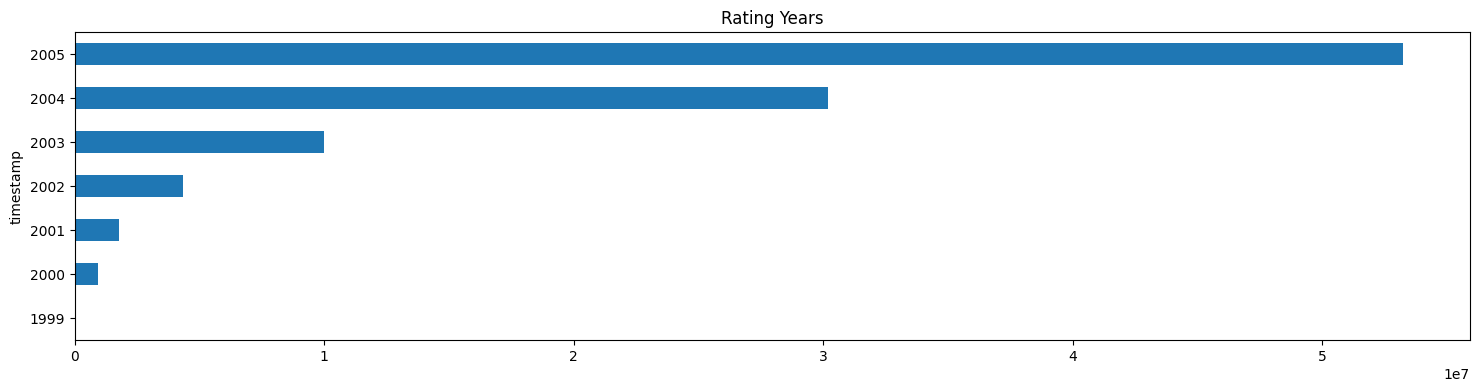

In [12]:
ratings["timestamp"].dt.year.value_counts().sort_index().plot(kind="barh", figsize=(18, 4),title="Rating Years")

<Axes: title={'center': 'Movie Years'}, ylabel='year'>

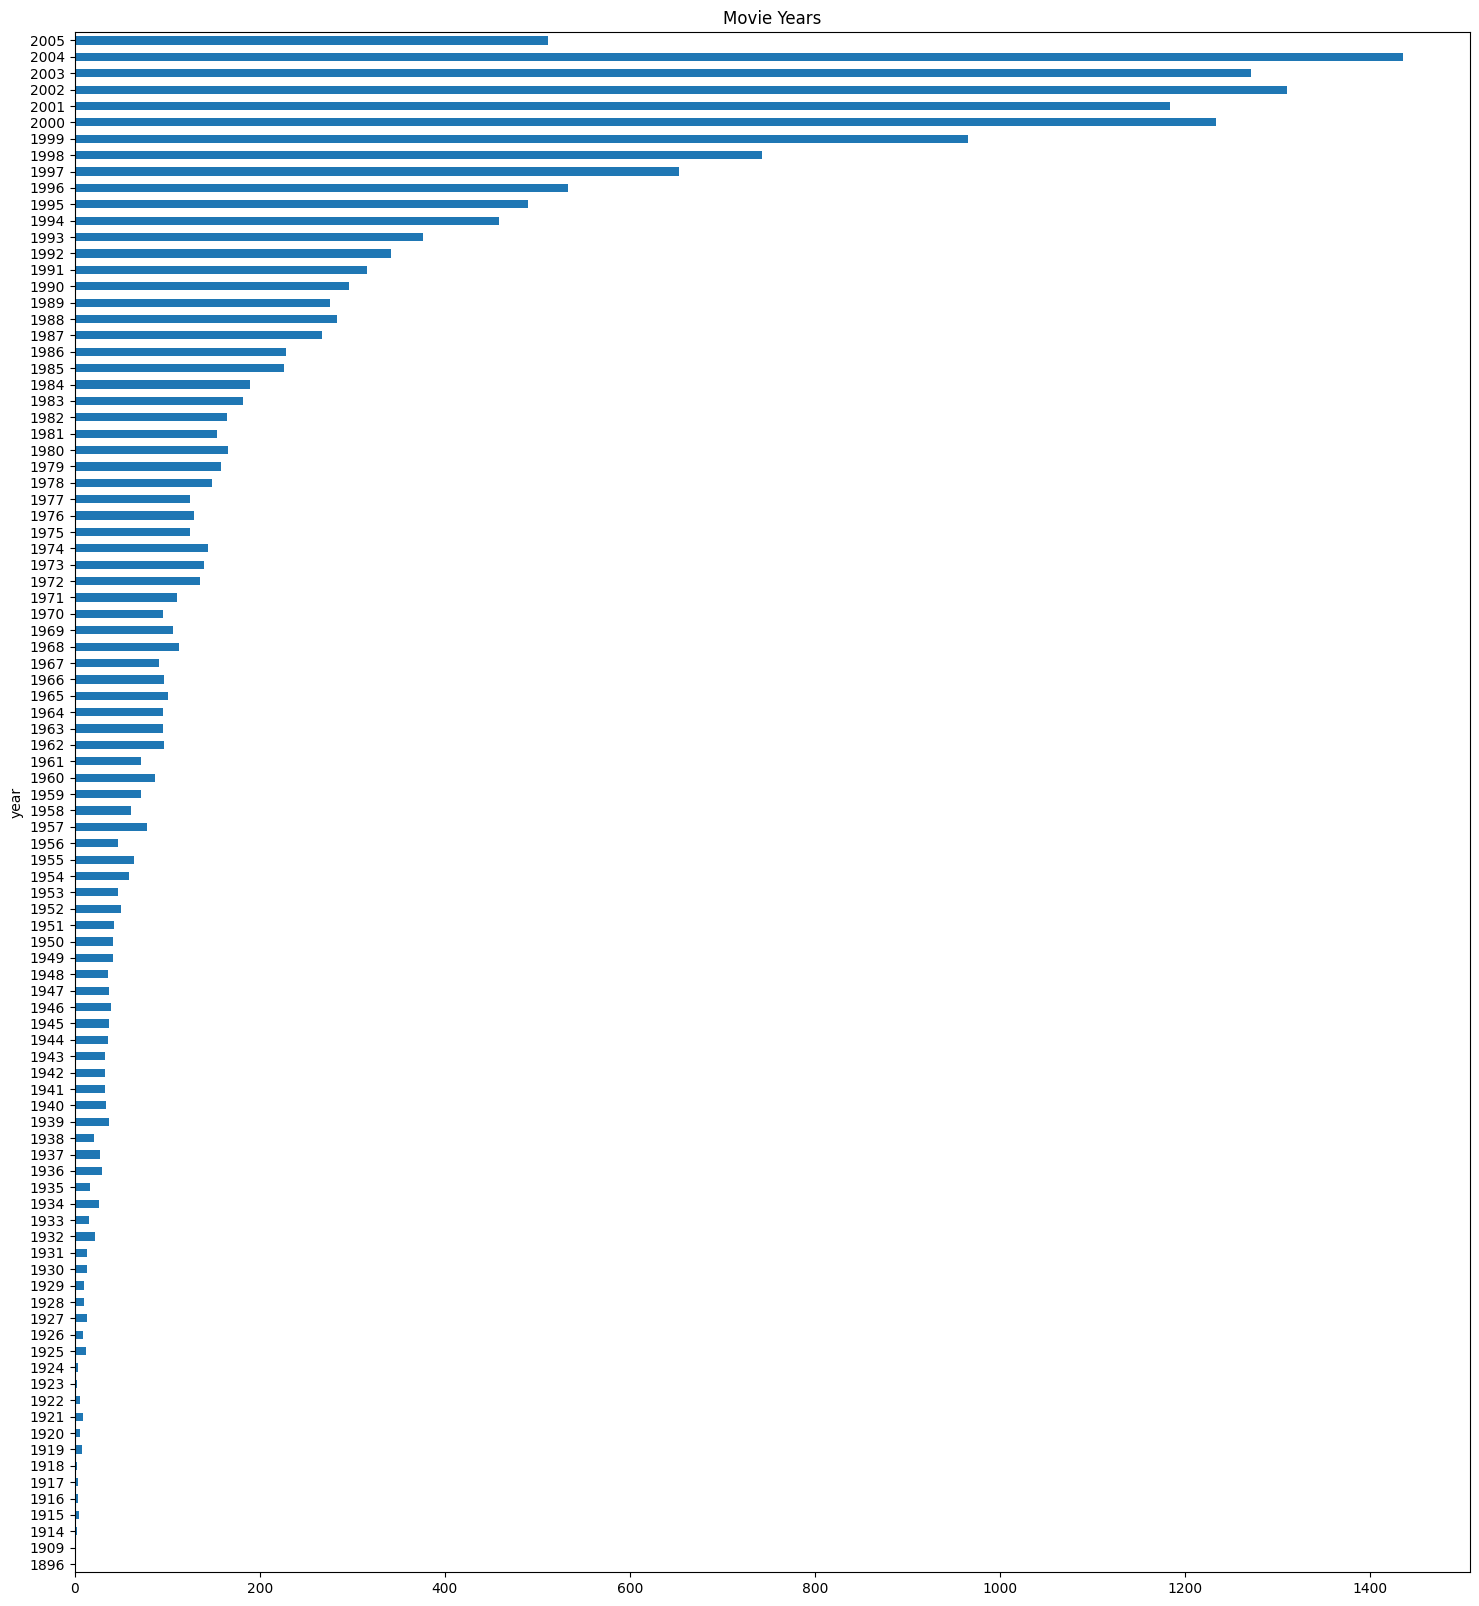

In [13]:
movies["year"].value_counts().sort_index().plot(kind="barh", figsize=(18, 20), title="Movie Years")